## Análise Exploratória

In [2]:
import pandas as pd
import os
from datetime import datetime, date, time
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("Set1")
plt.rcParams.update({'font.size': 13})

In [3]:
df = pd.read_csv('data.csv', index_col=0)

In [7]:
df[df['sexo'] != ('Ignorado')]

,dia_semana,uf,br,km,municipio,causa_principal,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,...,feridos_graves,mortos,latitude,longitude,regional,delegacia,data_hora,ano,mes,hora
0,domingo,PR,376.0,112.0,PARANAVAI,Sim,Fenômenos da Natureza,1.0,Queda de ocupante de veículo,Com Vítimas Feridas,...,1,0,"-23,09880731","-52,38789369",SR-PR,DEL7/7,2017-01-01 00:00:00,2017,1,0
1,domingo,SC,101.0,234.0,PALHOCA,Sim,Falta de Atenção à Condução,1.0,Colisão com objeto estático,Sem Vítimas,...,0,0,"-27,8101","-48,6357",SR-SC,DEL8/1,2017-01-01 00:01:00,2017,1,0
2,domingo,PR,153.0,56.9,SANTO ANTONIO DA PLATINA,Sim,Animais na Pista,1.0,Capotamento,Com Vítimas Feridas,...,0,0,"-23,36951985","309,93513107",SR-PR,DEL7/7,2017-01-01 00:00:00,2017,1,0
3,domingo,PR,153.0,56.9,SANTO ANTONIO DA PLATINA,Sim,Animais na Pista,1.0,Capotamento,Com Vítimas Feridas,...,0,0,"-23,36951985","309,93513107",SR-PR,DEL7/7,2017-01-01 00:00:00,2017,1,0
4,domingo,GO,153.0,435.0,ANAPOLIS,Sim,Avarias e/ou desgaste excessivo no pneu,1.0,Tombamento,Com Vítimas Feridas,...,1,0,"-16,27473677","-48,96908998",SR-GO,DEL1/2,2017-01-01 00:00:00,2017,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005535,segunda-feira,PR,116.0,125.0,FAZENDA RIO GRANDE,Sim,Falta de Atenção à Condução,1.0,Colisão lateral,Com Vítimas Feridas,...,0,0,"-25,59505309","-49,31630659",SR-PR,DEL7/1,2019-11-25 07:20:00,2019,11,7
1005536,segunda-feira,PR,116.0,125.0,FAZENDA RIO GRANDE,Sim,Falta de Atenção à Condução,1.0,Colisão lateral,Com Vítimas Feridas,...,0,0,"-25,59505309","-49,31630659",SR-PR,DEL7/1,2019-11-25 07:20:00,2019,11,7
1005537,segunda-feira,CE,222.0,1.4,CAUCAIA,Sim,Não guardar distância de segurança,1.0,Colisão traseira,Com Vítimas Feridas,...,1,0,"-3,736507","-38,65337",SR-CE,DEL16/1,2019-06-03 19:00:00,2019,6,19
1005538,segunda-feira,CE,222.0,1.4,CAUCAIA,Sim,Não guardar distância de segurança,1.0,Colisão traseira,Com Vítimas Feridas,...,0,0,"-3,736507","-38,65337",SR-CE,DEL16/1,2019-06-03 19:00:00,2019,6,19


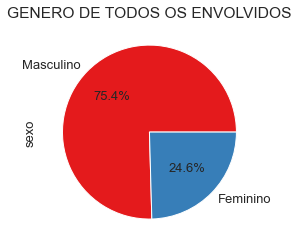

In [8]:
# contagem por genero quando é condutor ou passageiro
genero_all = df[df['sexo'] != ('Ignorado')]
genero_all = genero_all[genero_all['sexo'] != ('Não Informado')]
genero_all['sexo'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', title='GENERO DE TODOS OS ENVOLVIDOS');

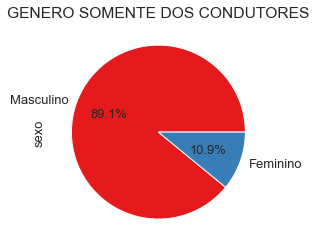

In [9]:
# contagem por genero quando é condutor
genero = df[df['sexo'] != ('Ignorado')]
genero = genero[genero['sexo'] != ('Não Informado')]
genero = genero[genero['tipo_envolvido'] == 'Condutor']
genero['sexo'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', title='GENERO SOMENTE DOS CONDUTORES');

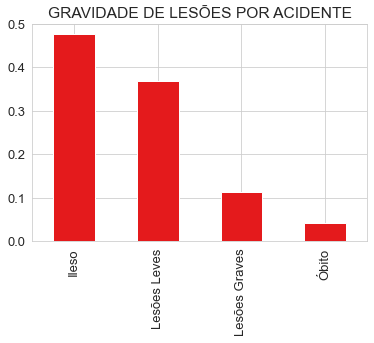

In [10]:
df['estado_fisico'].value_counts(normalize=True).plot.bar(title='GRAVIDADE DE LESÕES POR ACIDENTE');

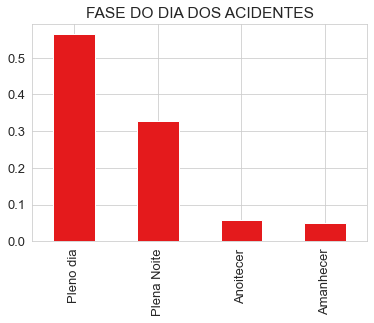

In [11]:
#fase do dia que mais ocorre acidentes
fase_dia = df['fase_dia'].value_counts(normalize=True)
fase_dia.plot.bar(title='FASE DO DIA DOS ACIDENTES');

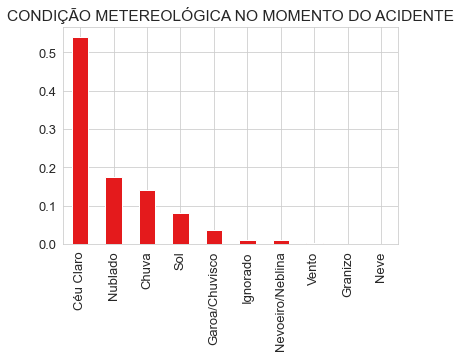

In [12]:
# qual a condição metereológica  dos acidentes ?
meter = df.condicao_metereologica.value_counts(normalize=True)
meter.plot.bar(title='CONDIÇÃO METEREOLÓGICA NO MOMENTO DO ACIDENTE');

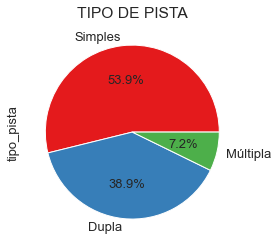

In [17]:
#tipo de pista 
pista1 = df.tipo_pista.value_counts(normalize=True)
pista1.plot.pie(autopct='%1.1f%%', title='TIPO DE PISTA');

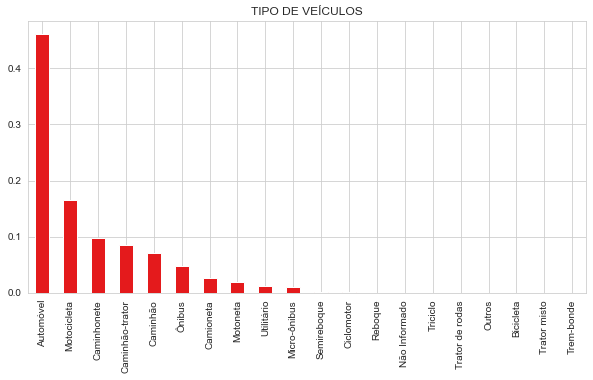

In [10]:
#tipo de veiculo no acidente
df.tipo_veiculo.value_counts(normalize=True).plot.bar(figsize=[10,5], title='TIPO DE VEÍCULOS');

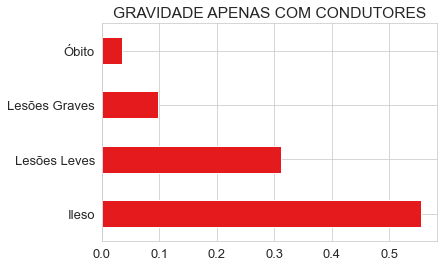

In [30]:
# qual o estado fisico das vitimas de acidentes como condutor
cond = df[df['tipo_envolvido'] == 'Condutor']
cond['estado_fisico'].value_counts(normalize=True).plot.barh(title='GRAVIDADE APENAS COM CONDUTORES');

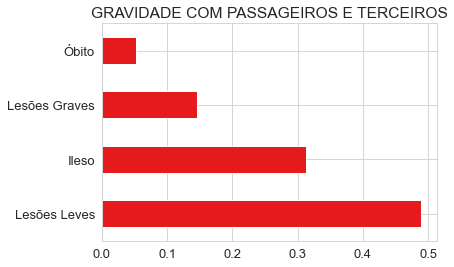

In [31]:
passag = df[df['tipo_envolvido'] != 'Condutor']
passag['estado_fisico'].value_counts(normalize=True).plot.barh(title='GRAVIDADE COM PASSAGEIROS E TERCEIROS');

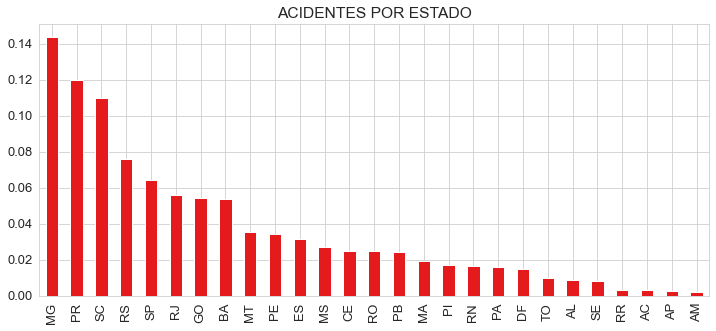

In [42]:
#acidentes por estados
df['uf'].value_counts(normalize=True).plot.bar(figsize=[12,5], title='ACIDENTES POR ESTADO');

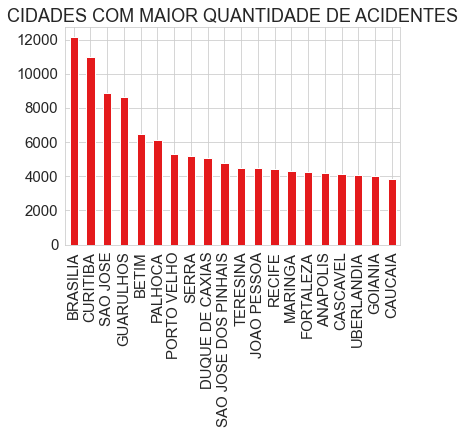

In [40]:
df['municipio'].value_counts(sort=True)[:20].plot.bar(title='CIDADES COM MAIOR QUANTIDADE DE ACIDENTES');

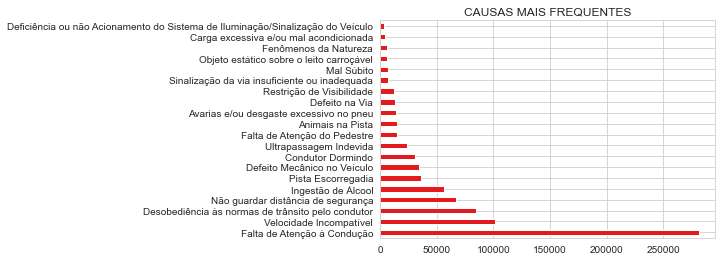

In [15]:
df['causa_acidente'].value_counts()[:20].plot.barh(title='CAUSAS MAIS FREQUENTES');

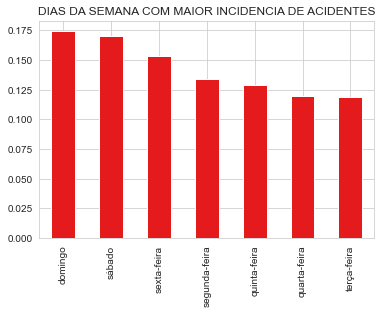

In [16]:
df['dia_semana'].value_counts(normalize=True).plot.bar(title='DIAS DA SEMANA COM MAIOR INCIDENCIA DE ACIDENTES');

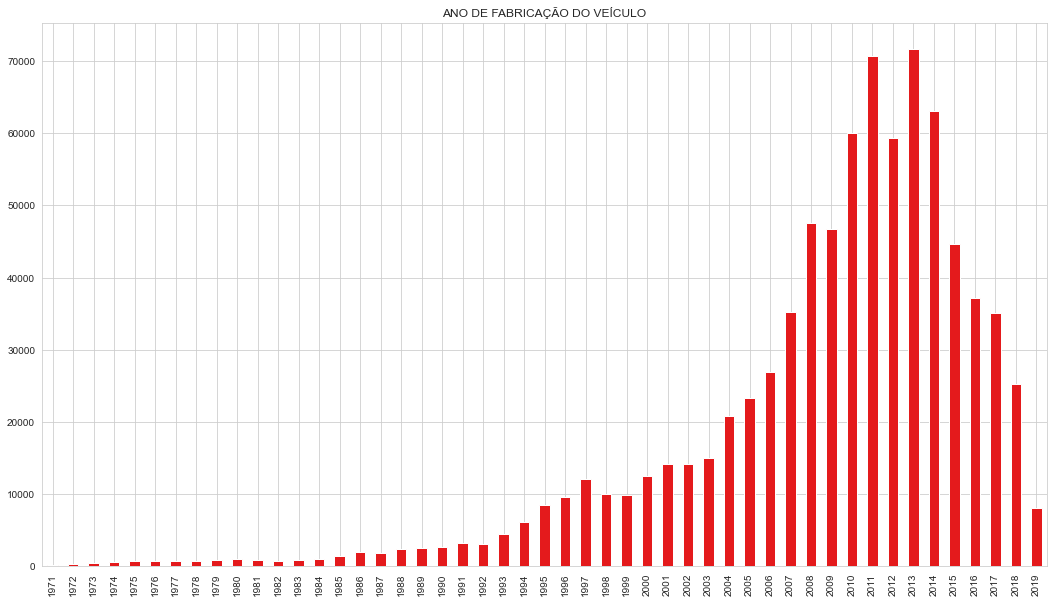

In [17]:
df.ano_fabricacao_veiculo = df.ano_fabricacao_veiculo.astype(int)
df_veiculo = df[df['ano_fabricacao_veiculo'] > 1970]
df_veiculo = df_veiculo.ano_fabricacao_veiculo.value_counts(sort=False).plot.bar(figsize=(18, 10), rot=90, title='ANO DE FABRICAÇÃO DO VEÍCULO');

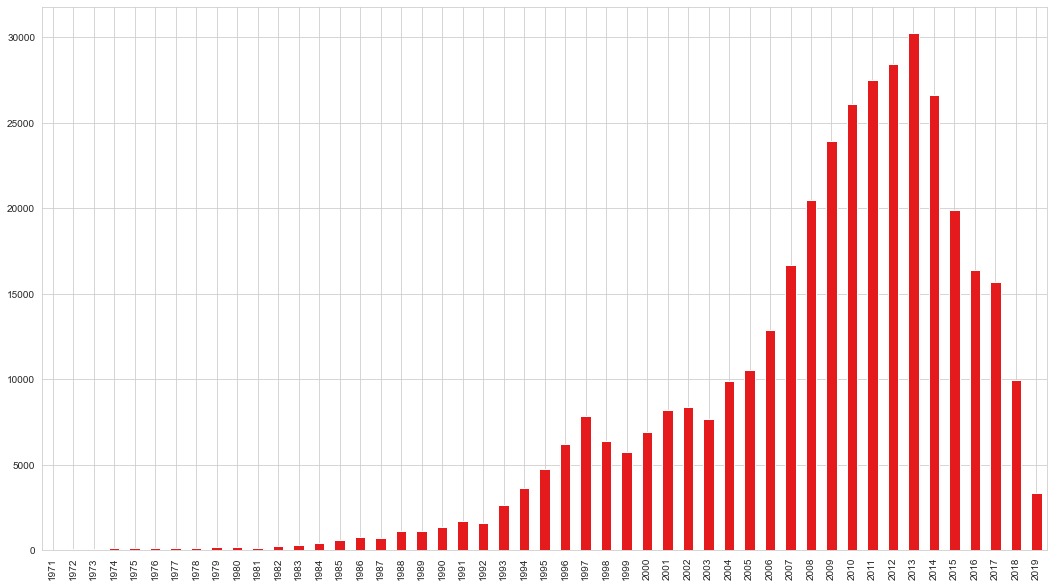

In [18]:
df_auto = df[df['tipo_veiculo'] == 'Automóvel']
df_auto = df_auto[df_auto['ano_fabricacao_veiculo'] > 1970]
df_auto = df_auto.ano_fabricacao_veiculo.value_counts(sort=False).plot.bar(figsize=(18, 10), rot=90);

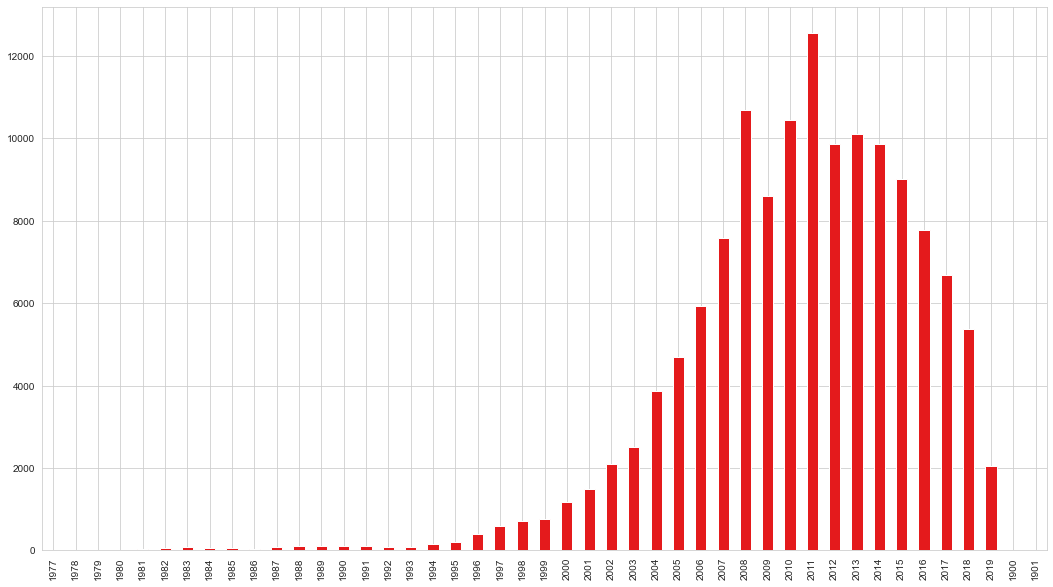

In [19]:
df_moto = df[df['tipo_veiculo'] == 'Motocicleta']
df_mt = df_moto['ano_fabricacao_veiculo'].value_counts(sort=False)
df_mt.plot.bar(figsize=(18, 10), rot=90);